<a href="https://colab.research.google.com/github/Riadhchibani/AngularApp/blob/main/tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


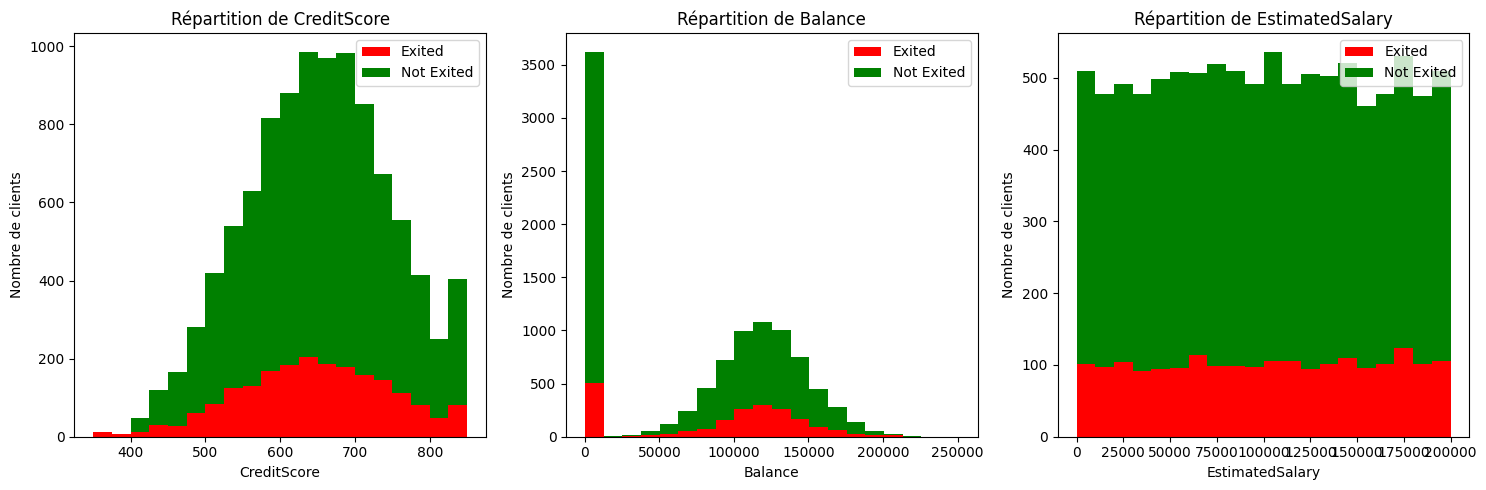

Colonnes avec des valeurs manquantes:
Index([], dtype='object')

Nombre de valeurs manquantes par colonne:
Series([], dtype: float64)

Lignes avec des valeurs manquantes:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

Nombre de valeurs manquantes par ligne:
Series([], dtype: int64)
Nombre de valeurs manquantes après imputation:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


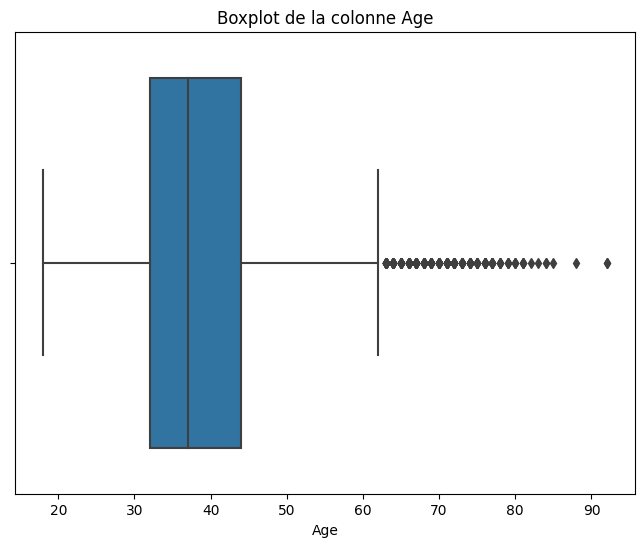

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder
#functions

#main work
PATH_CSV_FILE = '/content/Churn_Modelling.csv'
data = pd.read_csv(PATH_CSV_FILE)

#display data
#print('first 5 element')
#print(data.head())
#print('last 5 element')
#print(data.tail())
print(data.info())
#print(data.columns)
#print(data.shape)
#print(data.isnull())
#print(data.sum())
#print(data.mean)
#print(data.median)
#print(data.std)
#print(data.min)
#print(data.max)


exited_yes = data[data['Exited'] == 1]
exited_no = data[data['Exited'] == 0]

# Plot des courbes pour 'CreditScore', 'Balance' et 'EstimatedSalary'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist([exited_yes['CreditScore'], exited_no['CreditScore']], bins=20, stacked=True, color=['red', 'green'])
plt.title('Répartition de CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Nombre de clients')
plt.legend(['Exited', 'Not Exited'])

plt.subplot(1, 3, 2)
plt.hist([exited_yes['Balance'], exited_no['Balance']], bins=20, stacked=True, color=['red', 'green'])
plt.title('Répartition de Balance')
plt.xlabel('Balance')
plt.ylabel('Nombre de clients')
plt.legend(['Exited', 'Not Exited'])

plt.subplot(1, 3, 3)
plt.hist([exited_yes['EstimatedSalary'], exited_no['EstimatedSalary']], bins=20, stacked=True, color=['red', 'green'])
plt.title('Répartition de EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.ylabel('Nombre de clients')
plt.legend(['Exited', 'Not Exited'])

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sb.boxplot(x=data['Age'])
plt.title('Boxplot de la colonne Age')
plt.xlabel('Age')


# Identify columns with missing values
colonnes_manquantes = data.columns[data.isnull().any()]

# Display the number of missing values per column
nombre_valeurs_manquantes = data[colonnes_manquantes].isnull().sum()

# Identify rows with missing values
lignes_manquantes = data[data.isnull().any(axis=1)]

# Display the number of missing values per row
nombre_valeurs_manquantes_par_ligne = lignes_manquantes.isnull().sum(axis=1)

# Display the results
print("Colonnes avec des valeurs manquantes:")
print(colonnes_manquantes)
print("\nNombre de valeurs manquantes par colonne:")
print(nombre_valeurs_manquantes)
print("\nLignes avec des valeurs manquantes:")
print(lignes_manquantes)
print("\nNombre de valeurs manquantes par ligne:")
print(nombre_valeurs_manquantes_par_ligne)



colonnes_manquantes = data.columns[data.isnull().any()]

# Imputation des valeurs manquantes avec la valeur la plus courante (mode)
for colonne in colonnes_manquantes:
    mode_valeur = data[colonne].mode().iloc[0]
    data[colonne].fillna(mode_valeur, inplace=True)

# Répétez le processus pour la moyenne et la médiane si nécessaire
# Imputation avec la moyenne
# for colonne in colonnes_manquantes:
#     moyenne_valeur = data[colonne].mean()
#     data[colonne].fillna(moyenne_valeur, inplace=True)

# Imputation avec la médiane
# for colonne in colonnes_manquantes:
#     mediane_valeur = data[colonne].median()
#     data[colonne].fillna(mediane_valeur, inplace=True)

# Vérifiez si toutes les valeurs manquantes ont été traitées
print("Nombre de valeurs manquantes après imputation:")
print(data.isnull().sum())

# Enregistrez le DataFrame après imputation si nécessaire
# data.to_csv('data_apres_imputation.csv', index=False)

# Identifiez les colonnes catégorielles
colonnes_catégorielles = ['colonne1', 'colonne2', ...]  # Remplacez par vos colonnes

# Créez une instance de OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' pour éviter la colinéarité





In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
